<h1 align="center"><b>POS Tagging</b></h1>
<h3 align="center">For Telugu Language</h3>
<h3 align="center"><i>Submitted as part of IIIT-H LTRC Summer Internship Project              </i></h3>
<hr/>
<center> Mooga Lavan &emsp; B161399<br></center>
<center>Midasala Sai Venkata Richitha&emsp; B160592<br></center>
<center><span>Shravya Jellu</span> &emsp; B160545<br></center>
<center>Mounika Vura&emsp; B162035<br></center>

</br>
</br>
</br>


</br>
<center>
    Under the Supervision of : <br>
    <b>Dr. Manish Shrivastava</b><br>
    <b>IIIT-H LTRC</b><br>
    International Institute of Information Technology <br>
    <b>HYDERABAD</b><br>
        Email: <a href="mailto:m.shrivatava@iiit.ac.in">m.shrivatava@iiit.ac.in</a>
</ul></center>

<h1 align="center">FlowChart for Extracting POS Tags - Telugu</h1>



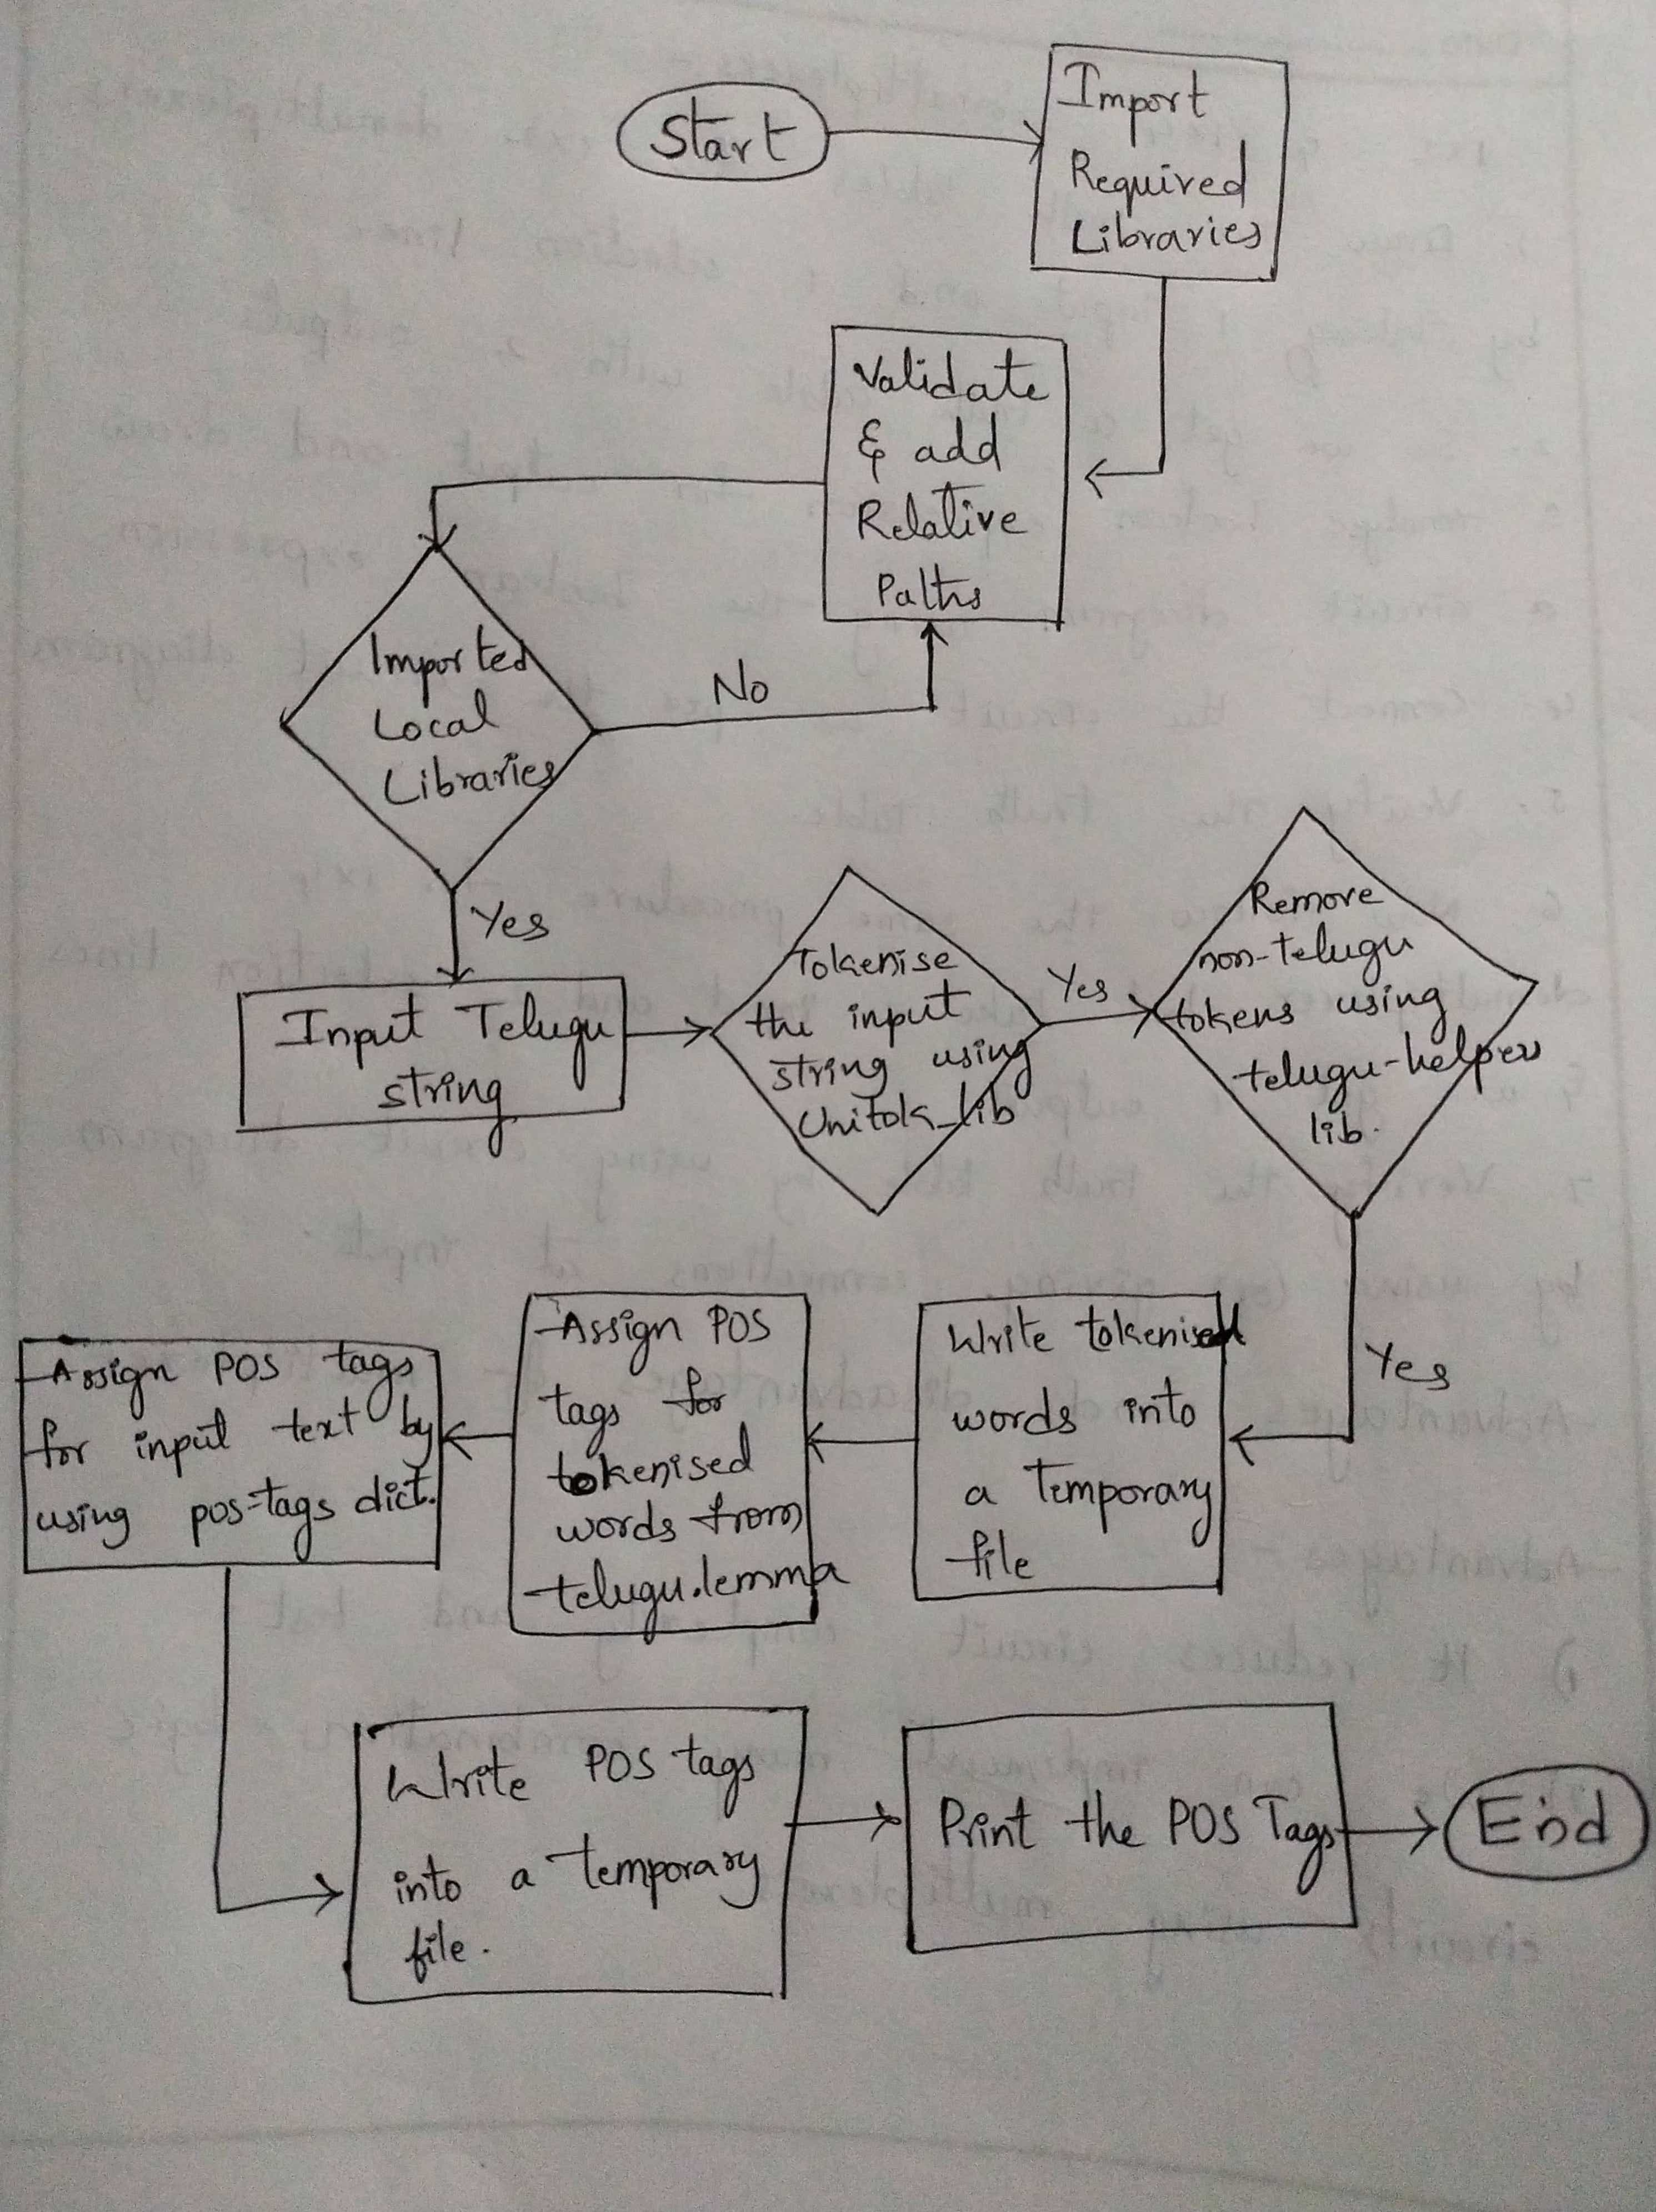

<h1 align="center">SOURCE CODE</h1>

In [1]:
# Mounting the Google Drive with Authentication
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


<h3>Importing Libraries</h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#downloading wiki.te.zip file
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.te.zip

--2021-06-24 08:54:20--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.te.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2990021886 (2.8G) [application/zip]
Saving to: ‘wiki.te.zip’

wiki.te.zip         100%[===================>]   2.78G  26.1MB/s    in 94s     

2021-06-24 08:55:55 (30.2 MB/s) - ‘wiki.te.zip’ saved [2990021886/2990021886]



In [4]:
#unzipping wiki.te.zip file
!unzip ./wiki.te.zip

Archive:  ./wiki.te.zip
  inflating: wiki.te.vec             
  inflating: wiki.te.bin             


<h3>Validating and Making Paths</h3>

In [10]:
# Adding Relative path for Accessing and Importing Library files
current_dir = '/content/drive/MyDrive/telugu_nlp/te_extract_pos_n_lemmas'
print("Current Directory:\t"+current_dir)

parent_dir = os.path.dirname(current_dir)
print("Parent Directory:\t"+parent_dir)

grandparent_dir = os.path.dirname(parent_dir)
print("GrandParent Directory:\t"+grandparent_dir)

lib_dir = parent_dir + "/lib/lang_tools_te/bin"
print("Libraries Directory:\t"+lib_dir)

lang_tools_path=parent_dir+"/lib/lang_tools_te"
print("POS Directory:\t"+lang_tools_path)

if grandparent_dir not in sys.path:
    sys.path.insert(0, grandparent_dir)
    
if lib_dir not in sys.path:
    sys.path.insert(0, lib_dir)
print(sys.path)

Current Directory:	/content/drive/MyDrive/telugu_nlp/te_extract_pos_n_lemmas
Parent Directory:	/content/drive/MyDrive/telugu_nlp
GrandParent Directory:	/content/drive/MyDrive
Libraries Directory:	/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin
POS Directory:	/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te
['/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin', '/content/drive/MyDrive', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


<h3>Importing Libraries</h3>

In [11]:
#Checking Whether the Files Existed or not to Import the Libraries

!ls /content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/*.py

/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/lemmatiser.py
/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/tag2vert.py
/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/te_helpers.py
/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/unitok_lib.py
/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/unitok.py


In [12]:
print(sys.path.append("/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/unitok_lib.py"))

None


In [13]:
# Appending the Libraries Path to the System Path for Accessing Libraries from that Path
import sys
sys.path.append(lib_dir)
# Importing Libraries used in local
import unitok_lib as unlib
importlib.reload(sys.modules['unitok_lib'])
import te_helpers as tehp
importlib.reload(sys.modules['te_helpers'])

<module 'te_helpers' from '/content/drive/MyDrive/telugu_nlp/lib/lang_tools_te/bin/te_helpers.py'>

<h3>Defining Functions</h3>

In [14]:
# Writing Input String into the temporary file
def write_to_tmp_file(te_list):
    with open(words_tmp_file_name, 'w',encoding="utf-8") as file: 
        file.write("<doc>\n")
        
        for word in te_list:
            file.write(word+"\n")
        
        file.write("</doc>")
        
    return
# Loading Taggers from telugu.lemma file and Store those in pos_tags dictionary 
def load_taggers():
    pos_tags={}
    words=[]
    tags=[]
    temp_tags=[]
    increment=0
    file=open(lemma_path,"r",encoding="utf-8")
    lines=file.readlines()
    for line in lines:
        sent_tokens=line.split()
        words.append(sent_tokens[0])
        temp_tags.append(sent_tokens[1])
    for each in temp_tags:
        temp=each.split(".")
        tags.append(temp[0])
    for each in words:
        if each not in pos_tags:
            pos_tags[each]=tags[increment]
            increment=increment+1
    return pos_tags
# Assign POS Tags to the Respective words in the input String by Comparing input words to pos_taggers dictionary 
def assign_taggers(input_words,pos_tags):
    result={}
    for each in input_words:
        if each in pos_tags:
            if each not in result:
                result[each]=pos_tags[each]
    return result
# Writing the resulted output pos tags dictionary of the input text into the Temporary files
def write_to_tag_file(final):
    with open(tagger_op_file, 'w',encoding="utf-8") as file: 
        file.write("<doc>\n")
        
        for word in final:
            file.write(word+"\t"+final[word]+"\n")
        
        file.write("</doc>")
        
    return

<h3>Store Names of Temporary Files</h3>

In [15]:
# Using Temporary Files to write the Input text and Output tags into the files
words_tmp_file_name = "/content/drive/MyDrive/telugu_nlp/te_extract_pos_n_lemmas/input.tmp"
tagger_op_file = "/content/drive/MyDrive/telugu_nlp/te_extract_pos_n_lemmas/output.tmp"

# Tagger file path
lemma_path="/content/drive/MyDrive/telugu_nlp/te_extract_pos_n_lemmas/telugu.lemma"
print(lemma_path)

/content/drive/MyDrive/telugu_nlp/te_extract_pos_n_lemmas/telugu.lemma


<h3>Input Telugu String</h3>

In [16]:
# Input the Telugu Text in the form of String 
te_string = "రాముడు మంచి బాలుడు. లక్ష్మణుడు శ్రీరాముని తమ్ముడు. హనుమంతుడు రామ భక్తుడు. రావణాసురుడు సీతని తీసుకు వెల్లాడు. రాముడు రావణున్ని వధించాడు."

<h3>Tokenize and Assign POS Tags</h3>

In [17]:
# Tokenising the Input string by using unitok_lib telugu library
te_list = unlib.tokenise(te_string, unlib.LANGUAGE_DATA['telugu']())

# Removing the non telugu words in the Input text by using telugu_helper library
te_list = tehp.remove_non_words(te_list)

# Write the string into temporary file (telugu_words.tmp)
write_to_tmp_file(te_list)

# Assign POS tags from telugu.lemma to the pos_tags dictionary
pos_tags=load_taggers()
print(len(pos_tags))

# Assign POS tags for input text from pos_tags dictionary
final=assign_taggers(te_list,pos_tags)



punctuations="!@#$%^&*()_-+={}:;''?/.,<>|"
# tagging not assingnes words using embedding 
pending_words_final={}
not_assigned_words=[]
for token in te_list:
  if(token not in final and token not in punctuations):
    not_assigned_words.append(token)

for each_not_assigned_word in not_assigned_words:
  output = []
  output.append(model_ft.wv.most_similar(each_not_assigned_word))
  top3SimilarWords=[]
  for i in range(3):
    top3SimilarWords.append(output[0][i][0])
    temp={}
    temp=assign_taggers(top3SimilarWords,pos_tags)
  if(len(temp)>0):
    pending_words_final[each_not_assigned_word]=temp[top3SimilarWords[0]]
  pending_words_final[each_not_assigned_word]="None"

#adding pending_words to the final dictionary
for each in pending_words_final:
  final[each]=pending_words_final[each]



# Writing the dictionary output into the temporary file
write_to_tag_file(final)







# Printing the Output of the Assigned POS Tags for the given String
for word in final:
    print(word+"-",final[word]+"\n")




345110
రాముడు- NNP

మంచి- JJ

బాలుడు- NN

లక్ష్మణుడు- NN

శ్రీరాముని- NNP

తమ్ముడు- NN

హనుమంతుడు- NN

రామ- NN

భక్తుడు- NN

రావణాసురుడు- NNP

సీతని- NNP

తీసుకు- VM

వెల్లాడు- VM

రావణున్ని- VM

వధించాడు- None



<center><p>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</p></center>

<h1 align="center">Libraries Used</h1>
<h3 align="left">General Libraries:</h3>
<ol>
    <li><strong>OS</strong>&nbsp;:&nbsp;<i>Automatically Performs many Operating System Tasks like Directory</i></li><br>
    <li><strong>SYS</strong>&nbsp;:&nbsp;<i>Used to manipulate different parts of python runtime environment</i></li><br>
    <li><strong>INSPECT</strong>&nbsp;:&nbsp;<i>Used get Information about Live Objects</i></li><br>
    <li><strong>IMPORTLIB</strong>&nbsp;:&nbsp;<i>Provide implementation of import statement and to Create Custom Objects</i></li><br>
    <li><strong>CODECS</strong>&nbsp;:&nbsp;<i>Provides Stream and file interfaces for transcoding the data</i></li><br>
    <li><strong>WARNINGS</strong>&nbsp;:&nbsp;<i>Warns the developer of situations that aren't necessarily exceptions</i></li>
</ol>
<h3 align="left">Local Libraries:</h3>
<ol>
    <li><strong>UNITOK_LIB</strong>&nbsp;:&nbsp;<i>Used to convert the input text into tokens</i></li><br>
    <li><strong>TE_HELPERS</strong>&nbsp;:&nbsp;<i>Used to Eliminate input Tokens other than Telugu Language </i></li>
</ol>
<center><p>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</p></center>

<h1 align="center">Functions Used</h1>
<h3 align="left">General Functions:</h3>
<ol>
    <li><strong>inspect.currentframe()</strong>&nbsp;:&nbsp;<i>Returns the Current Frame Loaded in the OS</i></li><br>
    <li><strong>inspect.getfile(current_frame)</strong>&nbsp;:&nbsp;<i>Returns the File currently working</i></li><br>
    <li><strong>os.path.abspath(file)</strong>&nbsp;:&nbsp;<i>Returns the Absolute Path of the file</i></li><br>
    <li><strong>os.path.dirname(file)</strong>&nbsp;:&nbsp;<i>Returns the Directory Name of the file existed </i></li><br>
    <li><strong>sys.path.insert(index,directory_name)</strong>&nbsp;:&nbsp;<i>Insert the path for library access in the specified index</i></li><br>
    <li><strong>importlib.reload(module_or_library)</strong>&nbsp;:&nbsp;<i>Reload the System Library or Module</i></li><br>
    <li><strong>unitok_lib.tokenise(string,LANGUAGE_DATA)</strong>&nbsp;:&nbsp;<i>Tokenise the input in SPecified Language</i></li><br>
    <li><strong>tehp.remove_non_words(list)</strong>&nbsp;:&nbsp;<i>Remove the Non Telugu Words in given list</i></li>
</ol>
<h3 align="left">User-Defined Functions:</h3>
<ol>
    <li><strong>write_to_tmp_file(list)</strong>&nbsp;:&nbsp;<i>Writes the input data into the Temporary File</i></li><br>
    <li><strong>load_taggers()</strong>&nbsp;:&nbsp;<i>Loads Taggers from telugu.lemma file and Store in pos_tags dictionary</i></li><br>
    <li><strong>assign_taggers(list,dictionary)</strong>&nbsp;:&nbsp;<i>Assign the POS tags for the given list</i></li><br>
    <li><strong>write_to_tag_file(dictionary)</strong>&nbsp;:&nbsp;<i>Writes the Assigned POS Tags into the Temporary File</i></li>
</ol>
<center><p>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</p></center>

<h1 align="center">Limitations and Enhancements</h1>
<h3 align="left">Limitations:</h3>
<ol>
    <li><strong>Words Missing</strong>&nbsp;:&nbsp;<pre>
    1. Removing the Non-Telugu Words in telugu heplers library
    2. Words not Matching with the Existed POS Tags</pre>
    </li>
    <li><strong>Limited Trained Data</strong>&nbsp;:&nbsp;<pre>
    1. May Results in unassigning of POS tags
    2. No other than Telugu words is allowed</pre>
    </li>
</ol>
<h3 align="left">Enhancements:</h3>
<ol>
    <li><strong>Words Missing</strong>&nbsp;:&nbsp;<pre>
    1. Store the Removed words and train the model for that words
    2. Not Assigned words should be Stored and shhould be trained to assign the POS tags</pre></li>
    <li><strong>Limited Trained Data</strong>&nbsp;:&nbsp;<pre>
    1. Should Increase the Trained Data from the previous work
    </pre></li>
</ol>
<center><p>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</p></center>

<h1 align="center">Applications</h1>
<ol>
    <li><strong>Named Entity Recognition</strong></li><br>
    <li><strong>Sentiment Analysis</strong></li><br>
    <li><strong>Word Sense Disambiguation</strong></li><br>
    <li><strong>Building lemmatizers</strong></li><br>
    <li><strong>Parsing of Sentences</strong></li><br>
    <li><strong>Speech Synthesis</strong></li><br>
    <li><strong>Information Extraction</strong></li>
</ol>

<h1 align="center">Thank You</h1>